In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [4]:
csv_path = "../../results/sslvr-domain.csv"

In [5]:
df = pd.read_csv(csv_path, index_col=0)

In [6]:
df

,UCF101,NTU,SS (V2),FineGym,EPIC (Verb)
None,75.36,92.87,56.81,89.41,25.67
SeLaVi,84.88,92.78,56.37,88.93,33.77
RSPNet,85.59,93.51,53.75,89.88,36.22
VideoMoCo,85.83,94.09,58.75,90.54,43.61
Pretext-contrast,86.60,93.86,54.03,90.31,34.29
CTP,89.77,94.31,60.16,92.17,42.84
TCLR,90.77,94.11,59.64,91.49,36.18
GDT,91.14,93.89,57.78,90.36,37.26
Supervised,94.08,93.89,61.02,91.77,47.67


In [7]:
df.columns = [["UCF101", "NTU", "Something-something", "FineGym", "EPIC (Verb)"]]

In [8]:
df

,UCF101,NTU,Something-something,FineGym,EPIC (Verb)
None,75.36,92.87,56.81,89.41,25.67
SeLaVi,84.88,92.78,56.37,88.93,33.77
RSPNet,85.59,93.51,53.75,89.88,36.22
VideoMoCo,85.83,94.09,58.75,90.54,43.61
Pretext-contrast,86.60,93.86,54.03,90.31,34.29
CTP,89.77,94.31,60.16,92.17,42.84
TCLR,90.77,94.11,59.64,91.49,36.18
GDT,91.14,93.89,57.78,90.36,37.26
Supervised,94.08,93.89,61.02,91.77,47.67


### Column-wise normalized

In [9]:
norm_df=(df-df.loc["None"])/(df.loc["Supervised"]-df.loc["None"])

In [61]:
def heatmap(
        df,
        figsize=(7, 6),
        title="Action classification",
        titlesize=20,
        labelsize=15,
        tickssize=13,
        save=False,
        save_path="../../results/plots/sample.pdf",
        **kwargs,
    ):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    if "cmap" not in kwargs:
        kwargs.update(dict(cmap="YlGnBu"))
    sns.heatmap(df, ax=ax, **kwargs)

    ax.set_title(title, fontsize=titlesize)

    ax.set_xlabel("Dataset")
    ax.set_ylabel("Method")
    
    ax.yaxis.label.set_size(labelsize)
    ax.xaxis.label.set_size(labelsize)

    ax.tick_params(axis='x', labelsize=tickssize)
    ax.tick_params(axis='y', labelsize=tickssize)
    
    if save:
        plt.savefig(save_path, bbox_inches="tight")

    plt.show()

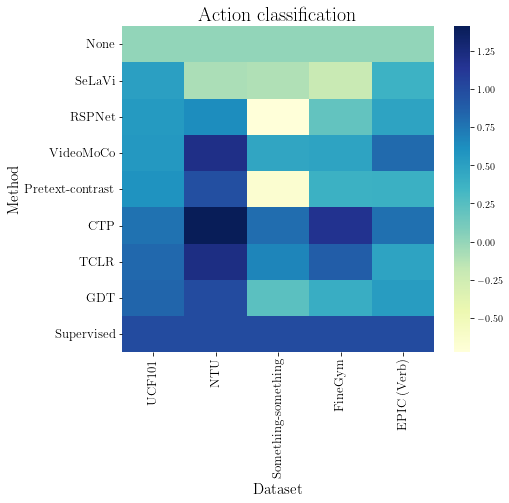

In [62]:
heatmap(norm_df)

### Normalizing between 0-1

In [33]:
normalized_df=(df-df.min())/(df.max()-df.min())

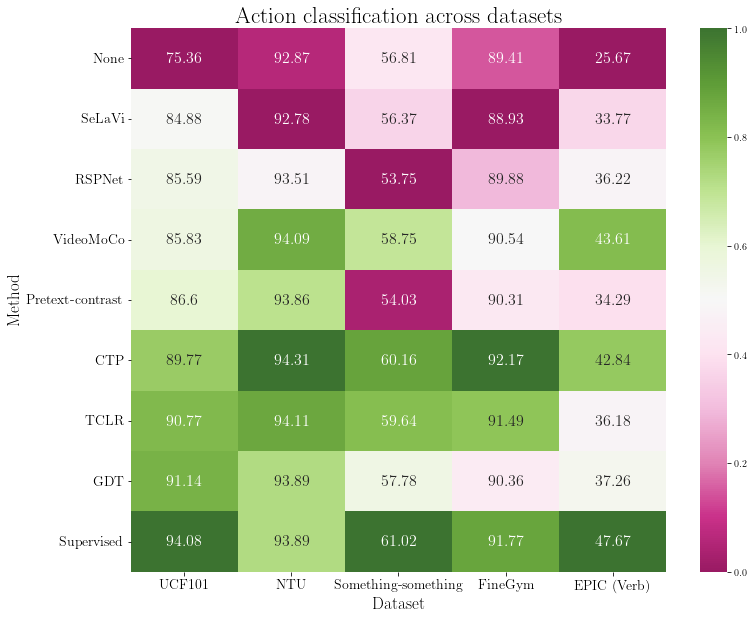

In [63]:
heatmap(
    normalized_df,
    figsize=(12, 10),
    title="Action classification across datasets",
    titlesize=23,
    labelsize=17,
    tickssize=14,
    save=True,
    save_path="../../results/plots/domains_expt_1.pdf",
    cmap="PiYG",
    alpha=0.9,
    annot=df.values,
    fmt='g',
    annot_kws={"size": 16},
)